In [139]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [140]:
airbnb<-read.csv('airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [141]:
head(airbnb,6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [142]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)<-newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [143]:
airbnb$MetrosCuadrados<-airbnb$PiesCuadrados*0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [144]:
summary(airbnb$CodigoPostal)

-        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            1           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            1           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004 
           1            1            1            1            1

In [145]:
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'|airbnb$CodigoPostal=='28'|airbnb$CodigoPostal=='']<-NA
airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA


airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004']<-'28004'


airbnb$CodigoPostal[airbnb$CodigoPostal=='2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815']<-'28015'

airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [268]:
length(unique(airbnb$CodigoPostal))
table(airbnb$CodigoPostal)

[1] 63


 28001 280013  28002  28003  28004  28005  28006  28007  28008  28009  28010 
   231      1    171    185   1795   1195    218    206    338    216    384 
 28011  28012  28013  28014  28015  28016  28017  28018  28019  28020  28021 
   250   2060   1019    630    601     76    107     43    200    192     58 
 28022  28023  28024  28025  28026  28027  28028  28029  28030  28031  28032 
    30     23     44    123     93    122    263    110     73     27     33 
 28033  28034  28035  28036  28037  28038  28039  28040  28041  28042  28043 
    89     45     59     67     65     77    160     16     63     90    103 
 28044  28045  28046  28047  28048  28049  28050  28051  28052  28053  28054 
    19    495     32     67      1      3     58     17      1     85     12 
 28055  28056  28058  28060  28094  28105  28850 
    12      1      1      1      1      1      1 

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [147]:
"Estos son los CP con más entradas:"      
head(sort(table(airbnb$CodigoPostal), decreasing=T),5)

"Estos son los CP con menos entradas:"   
head(sort(table(airbnb$CodigoPostal), decreasing=F),5)

[1] "Estos son los CP con más entradas:"


28012 28004 28005 28013 28014 
 2060  1795  1195  1019   630 

[1] "Estos son los CP con menos entradas:"


280013  28048  28052  28056  28058 
     1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [259]:
airbnb_cp28012<-unique(airbnb[which(airbnb$CodigoPostal=='28012'),]$Barrio)
airbnb_cp28012<-factor(airbnb_cp28012)
table(airbnb_cp28012)

airbnb_cp28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
              1               1               1               1               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
              1               1               1               1               1 
    Universidad 
              1 

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [154]:
cod_28012<-factor(airbnb[which(airbnb$CodigoPostal=='28012'),]$Barrio)

table(cod_28012)


'Todo depende de para qué quieras usar esos datos ya que, según se confirma en madrid.org, un solo código postal puede contener diferentes barrios y eso puede afectar a la hora de buscar, por ejemplo, alojamientos mejor ubicados según el interés del huesped (ej. bares, restaurantes, transportes disponibles, luegares a visitar...)'



cod_28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

[1] "Todo depende de para qué quieras usar esos datos ya que, según se confirma en madrid.org, un solo código postal puede contener diferentes barrios y eso puede afectar a la hora de buscar, por ejemplo, alojamientos mejor ubicados según el interés del huesped (ej. bares, restaurantes, transportes disponibles, luegares a visitar...)"

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [257]:
paste('Hay',length(unique(airbnb$Barrio)),'barrios')
table(airbnb$Barrio)



[1] "Hay 125 barrios"


                    Abrantes                      Acacias 
                          18                          145 
                     Adelfas                   Aeropuerto 
                          51                            6 
                     Aguilas             Alameda de Osuna 
                          15                           24 
                     Almagro                     Almenara 
                         155                           62 
                 Almendrales                       Aluche 
                          45                           45 
                      Ambroz                      Amposta 
                          12                            5 
            Apostol Santiago                     Arapiles 
                          15                          182 
                     Aravaca                        Arcos 
                          16                           18 
                   Argüelles                       Atoc

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [158]:
head(sort(table(airbnb$Barrio), decreasing=T),5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [159]:
paste('Hay un total de',length(unique(airbnb$TipoAlquiler)), "tipos de alquiler en el dataframe")
table(airbnb$TipoAlquiler)

[1] "Hay un total de 3 tipos de alquiler en el dataframe"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


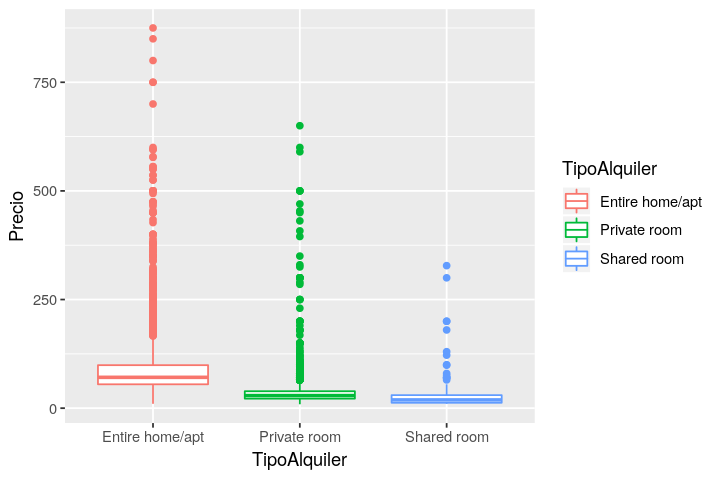

In [160]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [321]:
media_entire<-mean(with(airbnb, na.omit(Precio[TipoAlquiler=="Entire home/apt"])))
paste('El precio medio del apartamento completo es de',media_entire,'€')

media_private<-mean(with(airbnb, na.omit(Precio[TipoAlquiler=="Private room"])))
paste('El precio medio de la habitación privada es de',media_private,'€')

media_shared<-mean(with(airbnb, na.omit(Precio[TipoAlquiler=="Shared room"])))
paste('El precio medio de la habitación compartida es de',media_shared,'€')


medias<- c(media_entire, media_private,media_shared)
sp_test<-shapiro.test(medias)
sp_test


'Como la distribución no es normal, vamos a utilizar el test para distribuciones diferentes el de Kruskal-Wallis'

k<-kruskal.test( Precio ~ TipoAlquiler, data=airbnb)

k

[1] "El precio medio del apartamento completo es de 87.2966058763931 €"

[1] "El precio medio de la habitación privada es de 34.255135981217 €"

[1] "El precio medio de la habitación compartida es de 29.8534031413613 €"


	Shapiro-Wilk normality test

data:  medias
W = 0.80711, p-value = 0.1316


[1] "Como la distribución no es normal, vamos a utilizar el test para distribuciones diferentes el de Kruskal-Wallis"


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [162]:
airbnb_entire<-subset(airbnb,TipoAlquiler=="Entire home/apt")

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [252]:
head(sort(table(airbnb_entire$Barrio), decreasing=T),5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [165]:
precio_medio<-aggregate(.~ Barrio,airbnb_entire[c("Barrio","Precio")],mean,na.rm=TRUE)
precio_medio<-precio_medio[order(precio_medio$Precio, decreasing=T),]
head(precio_medio,5)
barrios<-head(precio_medio,5)$Barrio

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [166]:
num_apt<-data.frame(table(airbnb_entire$Barrio))
colnames(num_apt)<-c("Barrio","Entradas_apto")
precio_medio<-merge(num_apt,precio_medio,by="Barrio")

precio_medio<-precio_medio[order(precio_medio$Precio, decreasing=T),]
head(precio_medio,5)

,Barrio,Entradas_apto,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.7500
50,Fuentelareina,2,180.0000
93,Recoletos,135,161.9254
43,El Plantío,1,150.0000
30,Castellana,73,141.3889


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [175]:
num_apt<-subset(precio_medio,precio_medio$Entradas_apto>100)
head(num_apt,5)
barrios<-head(num_apt,5)$Barrio
barrios

,Barrio,Entradas_apto,Precio
,<fct>,<int>,<dbl>
93,Recoletos,135,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


[1] Recoletos Goya      Sol       Trafalgar Justicia 
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


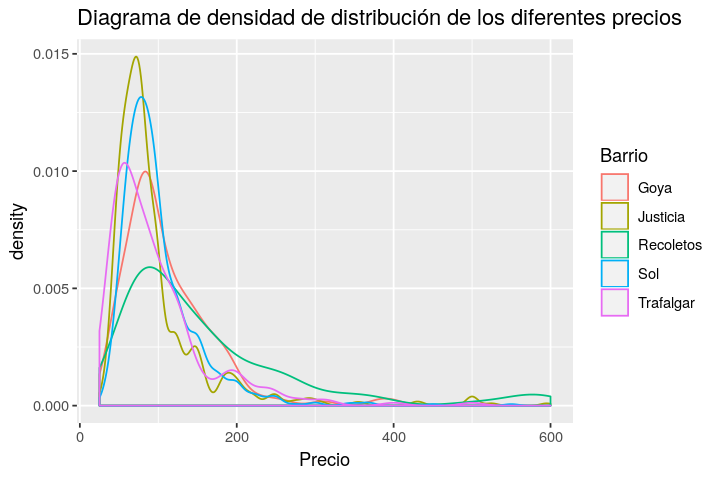

In [183]:
num_apt<-subset(airbnb_entire,Barrio%in% barrios)

ggplot(num_apt,aes(x=Precio,color=Barrio))+ ggtitle("Diagrama de densidad de distribución de los diferentes precios")+geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [288]:
num_apt<-subset(precio_medio,precio_medio$Entradas_apto>100)
precio_medio_2<-aggregate(.~ Barrio,airbnb_entire[c("Barrio","MetrosCuadrados")],mean,na.rm=TRUE)

num_apt<-merge(num_apt,precio_medio_2,by="Barrio")

num_apt<-num_apt[order(num_apt$Precio, decreasing=T),]

head(num_apt,5)
metroscuad<-head(num_apt,5)$MetrosCuadrados

metroscuad


,Barrio,Entradas_apto,Precio,MetrosCuadrados
,<fct>,<int>,<dbl>,<dbl>
8,Recoletos,135,161.92537,26.66316
4,Goya,142,111.33803,51.68504
9,Sol,701,100.75036,45.61692
10,Trafalgar,223,98.57848,29.30426
5,Justicia,534,98.25468,28.52669


[1] 26.66316 51.68504 45.61692 29.30426 28.52669

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

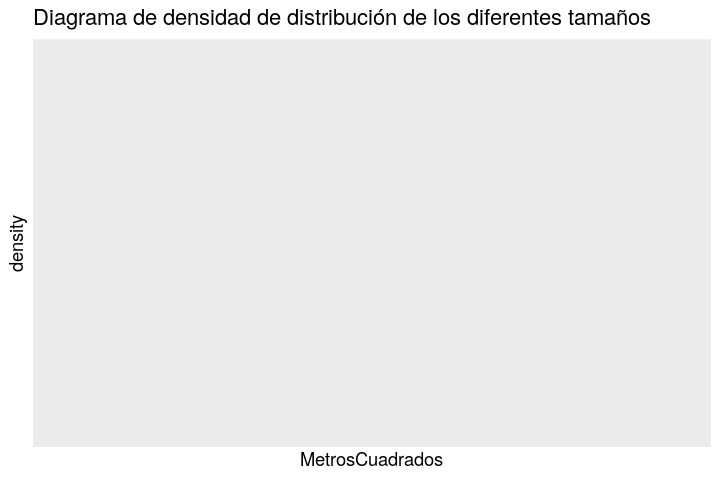

In [289]:
tam_apt<-subset(airbnb_entire, MetrosCuadrados %in% metroscuad)

ggplot(tam_apt,aes(x=MetrosCuadrados,color=Barrio))+ ggtitle("Diagrama de densidad de distribución de los diferentes tamaños")+geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [327]:
metroscuad
sp_test<-shapiro.test(metroscuad)
sp_test
'Como la distribución no es normal, vamos a utilizar el test para distribuciones diferentes Welch'

t.test(x=num_apt$MetrosCuadrados,y=num_apt$Precio)

[1] 26.66316 51.68504 45.61692 29.30426 28.52669


	Shapiro-Wilk normality test

data:  metroscuad
W = 0.81942, p-value = 0.1156


[1] "Como la distribución no es normal, vamos a utilizar el test para distribuciones diferentes Welch"


	Welch Two Sample t-test

data:  num_apt$MetrosCuadrados and num_apt$Precio
t = -8.3231, df = 13.429, p-value = 1.153e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -83.39484 -49.11240
sample estimates:
mean of x mean of y 
 31.43186  97.68548 


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [350]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
model <- lm(data=barrio_sol, formula=MetrosCuadrados ~ NumDormitorios + MaxOcupantes+ NumBanyos)
model


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios + MaxOcupantes + 
    NumBanyos, data = barrio_sol)

Coefficients:
   (Intercept)  NumDormitorios    MaxOcupantes       NumBanyos  
        -1.827          23.544          -2.543          18.028  


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [351]:
summary(model)


Call:
lm(formula = MetrosCuadrados ~ NumDormitorios + MaxOcupantes + 
    NumBanyos, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.723 -29.574  -0.324  30.441 110.415 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -1.827     13.708  -0.133  0.89443   
NumDormitorios   23.544      8.183   2.877  0.00567 **
MaxOcupantes     -2.543      3.463  -0.734  0.46585   
NumBanyos        18.028     13.362   1.349  0.18272   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.34 on 56 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3452,	Adjusted R-squared:  0.3102 
F-statistic: 9.843 on 3 and 56 DF,  p-value: 2.597e-05


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


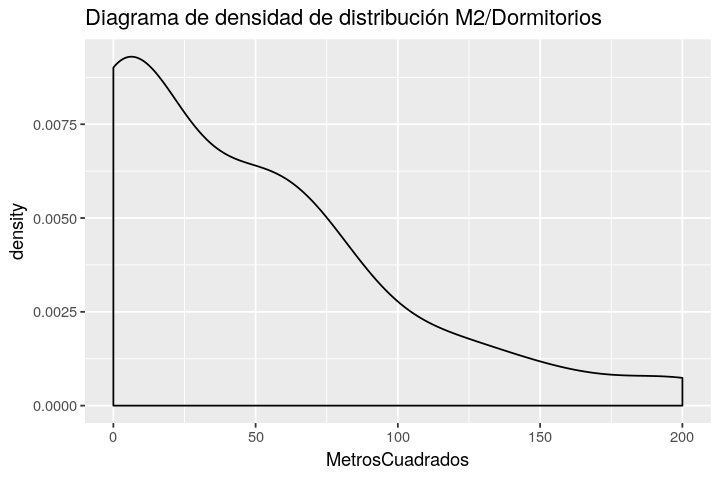

In [348]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

ggplot(barrio_sol,aes(x=MetrosCuadrados,color=NumDormitorios))+ ggtitle("Diagrama de densidad de distribución M2/Dormitorios")+geom_density()

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [366]:
Test_anova <- aov(Precio ~ NumDormitorios + MetrosCuadrados, barrio_sol)
summary(Test_anova)




                Df Sum Sq Mean Sq F value   Pr(>F)    
NumDormitorios   1  76169   76169   71.57 1.19e-11 ***
MetrosCuadrados  1  11725   11725   11.02  0.00158 ** 
Residuals       57  60661    1064                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
641 observations deleted due to missingness

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [368]:
"La variable más fiable es la de NumDormitorios porque tiene un p-valor más significativo"

[1] "La variable más fiable es la de NumDormitorios porque tiene un p-valor más significativo"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?